In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns

In [6]:
data=pd.read_excel("jharkhand.xlsx")

In [7]:
data['Timestamp']=pd.to_datetime(data.Timestamp)

In [8]:
data.head()

,Timestamp,demand
0,2022-04-01 00:00:00,63.1060
1,2022-04-01 00:15:00,67.4580
2,2022-04-01 00:30:00,52.4316
3,2022-04-01 00:45:00,54.9388
4,2022-04-01 01:00:00,57.2732


In [9]:
df=data.iloc[:1344]

In [10]:
cols=list(df)[1:2]

In [11]:
df_for_training=df[cols].astype(float)


In [12]:
scaler=MinMaxScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled=scaler.transform(df_for_training)

In [13]:
trainX=[]
trainY=[]

In [14]:
n_future=1
n_past=96

In [15]:
for i in range(n_past,len(df_for_training_scaled )):
    trainX.append(df_for_training_scaled[i-n_past:i,0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,0])
trainX,trainY=np.array(trainX),np.array(trainY)

In [38]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))

In [39]:
model=Sequential()
model.add(LSTM(64,activation='relu',input_shape=(None,trainX.shape[2]),return_sequences=True))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


In [40]:
history=model.fit(trainX,trainY,epochs=20,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/20
71/71 [==============================] - 39s 72ms/step - loss: 0.1408 - val_loss: 0.1266
Epoch 2/20
71/71 [==============================] - 1s 9ms/step - loss: 0.1188 - val_loss: 0.1208
Epoch 3/20
71/71 [==============================] - 1s 14ms/step - loss: 0.1178 - val_loss: 0.1200
Epoch 4/20
71/71 [==============================] - 1s 16ms/step - loss: 0.1150 - val_loss: 0.1189
Epoch 5/20
71/71 [==============================] - 1s 11ms/step - loss: 0.1121 - val_loss: 0.1156
Epoch 6/20
71/71 [==============================] - 1s 9ms/step - loss: 0.1095 - val_loss: 0.1150
Epoch 7/20
71/71 [==============================] - 1s 14ms/step - loss: 0.1101 - val_loss: 0.1179
Epoch 8/20
71/71 [==============================] - 1s 12ms/step - loss: 0.1081 - val_loss: 0.1151
Epoch 9/20
71/71 [==============================] - 1s 17ms/step - loss: 0.1087 - val_loss: 0.1136
Epoch 10/20
71/71 [==============================] - 1s 9ms/step - loss: 0.1076 - val_loss: 0.1141
Epoch 11/20

In [41]:
prediction = model.predict(trainX[-96:])

3/3 [==============================] - 4s 0s/step


In [42]:
forcast_period_times=df['Timestamp'].iloc[576:].tolist()

In [43]:
forcast=model.predict(trainX[-96:])
forcast_copies=np.repeat(forcast,df_for_training.shape[1],axis=-1)

3/3 [==============================] - 0s 8ms/step


In [44]:
df_for_training.shape

(1344, 1)

In [45]:
y_pred=scaler.inverse_transform(forcast_copies)[:,0]

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
df1=data.iloc[1344:1344+96]

In [ ]:
df1

In [ ]:
df1['predict']=y_pred

In [46]:
df1

,Timestamp,demand,predict
1344,2022-04-15 00:00:00,61.1048,54.715054
1345,2022-04-15 00:15:00,55.1448,53.462517
1346,2022-04-15 00:30:00,54.5452,54.269329
1347,2022-04-15 00:45:00,60.1852,57.427628
1348,2022-04-15 01:00:00,60.0252,58.778751
...,...,...,...
1435,2022-04-15 22:45:00,60.1288,58.667366
1436,2022-04-15 23:00:00,49.0368,55.714691
1437,2022-04-15 23:15:00,51.9200,54.579887
1438,2022-04-15 23:30:00,48.0904,52.901604


C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Timestamp', ylabel='demand'>

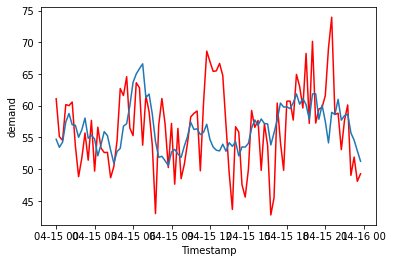

In [47]:
sns.lineplot(df1['Timestamp'],df1['demand'],color='red')
sns.lineplot(df1['Timestamp'],df1['predict'])

In [29]:
np.size(y_pred)

96